# Import Statements

In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Train and Validation Split

In [2]:
#Pass the percentage of data you need for test like 20 % 
def train_split(df,test_per):
    indices=df.index.tolist()
    test_size=round(len(df)*(test_per/100))
    random.seed(0)
    test_indices=random.sample(population=indices,k=test_size)
    valid_df=df.loc[test_indices]
    train_df=df.drop(test_indices)
    return train_df,valid_df

# Hypothesis

In [3]:
def cal_hypothesis(x,B):
    #hypothesis h(x) = 1/(1+ pow(e,-(B.T*x)))   #hypothesis=X.T*B as X=data.T
    t=x.dot(B)
    exp_part=math.exp(float(-t))
    hypothesis=1/(1+exp_part)
    return hypothesis

# Cost function

In [4]:
def cost_function(X,Y,B):
    #Cost function J=(-1/m)*(sum((yi*log(hypothesis(xi)))+((1-yi)*log(1-hypothesis(xi))))
    m = len(Y)
    J=0
    for i in range(0,m):
        x=X[i]
        y=Y[i]
        h=cal_hypothesis(x,B)
        J-=((y*np.log(h))+((1-y)*np.log(1-h)))
    J/=m
    return J

# Gradient Descent

In [5]:
def gradient_descent(X,Y,B,alpha,prev_cost):
    #formula: Bj=Bj-alpha*((hypothesis(x)-y)*xj)
    m=len(Y)
    for j in range(0,len(B)):
        sum=0
        gradient=1
        for i in range(0,m):
            x=X[i]
            y=Y[i]
            hypothesis=cal_hypothesis(x,B)
            sum+=(hypothesis-y)*x[j]
        gradient=sum
        #update B
        B[j]-=alpha*gradient
    cost=cost_function(X,Y,B)
    #print(prev_cost,cost)
    if(abs(prev_cost - cost) <  0.000001):
        return B,cost
    else:
        B,cost=gradient_descent(X,Y,B,alpha,cost)
    return B,cost

# Predict

In [6]:
def predict_prob(x,B):
    prob=cal_hypothesis(x,B)
    #print("Predicted prob-",prob)
    return prob

In [7]:
def predict_ans(x,B,threshold):
    prob=predict_prob(x,B)
    if(prob >= threshold):
        return 1
    else:
        return 0
    return 0

In [8]:
def confusion_mat(X,Y,B,threshold):
    true_val=1
    false_val=0
    total=len(X)
    actual_list=[]
    predicted_list=[]
    TN=0
    TP=0
    FP=0
    FN=0
    for i in range(0,total):
        actual = Y[i]
        actual_list.append(actual)
        predicted = predict_ans(X[i],B,threshold)
        predicted_list.append(predicted)
        if( actual > threshold):
            actual=1
        else:
            actual=0
        if(actual==false_val and predicted==false_val):
            TN+=1
        if(actual==true_val and predicted==false_val):
            FN+=1
        if(actual==false_val and predicted==true_val):
            FP+=1
        if(actual==true_val and predicted==true_val):
            TP+=1
    #measures=[accuracy,misclassification,precision,recall,f1score]
    measures=[]
    accuracy=(TN+TP)/total
    measures.append(accuracy)
    misclassification=(FN+FP)/total
    measures.append(misclassification)
    if( TP+FP > 0):
        precision=TP/(TP+FP)
    else:
        precision=0
    measures.append(precision)
    if( TP+FN > 0):
        recall=TP/(TP+FN)
    else:
        recall=0
    measures.append(recall)
    if( precision !=0 and recall !=0):
        f1score=2/((1/precision)+(1/recall))
    else:
        f1score=0
    measures.append(f1score)
    return measures

In [9]:
def plot_graph(actual_list,predicted_list,title):
    x_labels=[]
    for i in range(len(actual_list)):
        x_labels.append(i)
        
    area=np.pi
    plt.xlabel("Students")
    plt.ylabel("Chance of Admit")
    plt.title(title)

    plt.scatter(x_labels, predicted_list, s=area, c='blue', alpha=0.5)
    plt.scatter(x_labels, actual_list, s=area, c='red', alpha=0.5)

    plt.show()
    return

# Helper Functions

In [10]:
#Creating X(data.T),Y arrays from df
def to_arrays(df,label):
    no_rows,no_cols=df.shape
    header=list(df.columns)
    data_array=np.ones((no_cols-1,no_rows))
    X0=np.ones(no_rows)                      #X0=1
    for i in range(0,no_cols-1):             #Removing first col-serial no , last col-label
        if(i == 0):
            data_array[i]=X0
        else:
            x=df[header[i]].values
            #data_array[i]=x
            data_array[i]=mean_normalize(x)
    X=data_array.T        #Doing Transpose

    #Y (output) array
    Y=np.array(df[label].values)  
    return X,Y

In [11]:
def mean_normalize(x):
    x_new=np.ones(len(x))
    mean=np.mean(x)
    std=np.nanstd(x)
    for i in range(0,len(x)):
        x_new[i]=(x[i]-mean)/std
    return x_new

# Part 3:Relation between Threshold and Precision and Recall

In [12]:
def threshold_rel(valid_X,valid_Y,B):
    x_labels=[]   #Threshold
    y1_labels=[]  #Precision
    y2_labels=[]  #Recall
    for threshold in (0.5,0.6,0.7,0.8,0.9):
            x_labels.append(threshold)
            measures=confusion_mat(valid_X,valid_Y,B,threshold)
            y1_labels.append(measures[2])
            y2_labels.append(measures[3])
    
    area=2*np.pi
    plt.xlabel("Threshold")
    plt.ylabel("Presicion and Recall")
    plt.title("Threshold VS Precision and Recall")
    plt.scatter(x_labels, y1_labels, s=area, c='red', alpha=0.5)
    plt.scatter(x_labels, y2_labels, s=area, c='blue', alpha=0.5)
    plt.show()
    return    

Accuracy is not the suitable indicator for the model when you have unbalanced distribution or costs.
It depends on the importance. Once it is related to a disease you can use big value for  threashold, once it is business related you can use the principles of an expected value framework.
Here we consider chance of admit into college.So we need to take threshold >= 0.5 based on number of seats available.

# Main

In [13]:
def main():
    file="AdmissionDataset/data.csv"
    label='Chance of Admit '
    no_coefficients=8  #[B0,B1,B2,...,B7] also 7 columns but X0=1
    
    df=pd.read_csv(file)
    header=list(df.columns)
   
    train_df,valid_df=train_split(df,20)
    
    #Training
    train_X,train_Y=to_arrays(train_df,label)
    
    #B(beta) array of coefficients
    #Initialized to zero
    B = np.zeros(no_coefficients)

    alpha = 0.0003
    threshold=0.5
        
    init_J=cost_function(train_X,train_Y,B)
    print("Initial_cost- ",init_J)
    
    B,final_J=gradient_descent(train_X,train_Y,B,alpha,init_J)
    print("Final_cost- ",final_J)
    print(B)
    
    #Prediction
    valid_X,valid_Y=to_arrays(valid_df,label)
    print("\n\n-------Prediction------")
    measures=confusion_mat(valid_X,valid_Y,B,threshold)
    print("Accuracy-",measures[0])
    print("Misclassification-",measures[1])
    print("Precision-",measures[2])
    print("Recall-",measures[3])
    print("F1 score-",measures[4])
    
    ##Part-3
    threshold_rel(valid_X,valid_Y,B)
    
    return

Initial_cost-  0.6931471805599467
Final_cost-  0.5513844008975722
[1.03648786 0.14662503 0.11971285 0.06913891 0.0276243  0.07143319
 0.28529753 0.0742691 ]


-------Prediction------
Accuracy- 0.9222222222222223
Misclassification- 0.07777777777777778
Precision- 0.9411764705882353
Recall- 0.975609756097561
F1 score- 0.9580838323353292


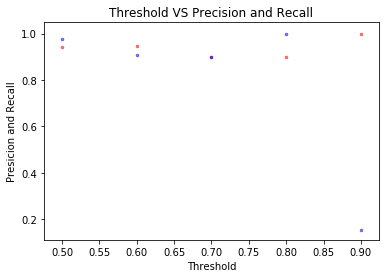

In [14]:
if __name__ == "__main__":
    main()